In [13]:
#https://blog.csdn.net/weixin_30950887/article/details/95788442

最大回撤为： 0.002839788020527978
最大回撤恢复时间为（天）： 7
最大回撤持续期为（天）： 90


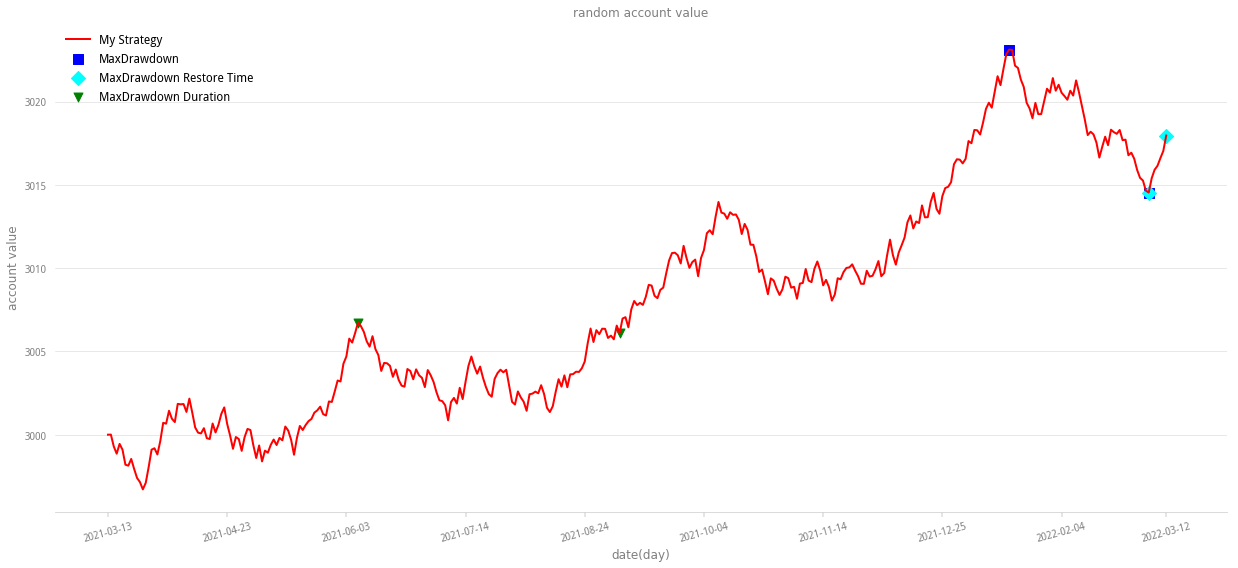

In [15]:

import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import matplotlib.ticker as ticker
import numpy as np
import random
 
DAYS = 365  
 
def Init():
    timedelta = datetime.timedelta(days = 1)
    startdate = datetime.date.today()
    
    xdate = [startdate+i*timedelta for i in range(DAYS)]
    
    ycapital = [3000]
    for _ in range(DAYS-1):
        ycapital.append(ycapital[-1]+random.uniform(-1, 1.1))
        
    return xdate, ycapital
 
def max_drawdown(xdate, ycapital):
    
    # 计算每日的回撤
    drawdown = []
    tmp_max_capital = ycapital[0]
    for c in ycapital:
        tmp_max_capital = max(c, tmp_max_capital)
        drawdown.append(1 - c / tmp_max_capital)
    
    # 最大回撤
    MaxDrawdown = max(drawdown)
    # 计算最大回撤日期范围
    endidx = np.argmax(drawdown)
    #enddate = xdate[endidx]
    
    startidx = np.argmax(ycapital[:endidx])
    #startdate = xdate[startidx]
    #仅仅画图的话，我们只要索引值更加方便
    return MaxDrawdown, startidx, endidx
 
def max_drawdown_duration(xdate, ycapital):
    
    duration = []
    tmp_max_capital = ycapital[0]
    for c in ycapital:
        if c >= tmp_max_capital:
            duration.append(0)
        else:
            duration.append(duration[-1]+1)
        tmp_max_capital = max(c, tmp_max_capital)
 
    MaxDDD = max(duration)
    
    #fig, ax = plt.subplots(figsize = (21, 9)) 
    #plt.plot(xdate, duration)
    #ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))
    endidx = np.argmax(duration)
    startidx = endidx - MaxDDD
    
    return MaxDDD, startidx, endidx
 
def max_drawdown_restore_time(startidx, endidx, xdate, ycapital):
    """
    startidx:表示最大回撤的开始时间在 xdate 中的索引，由 max_drawdown 方法返回
    endidx:表示最大回撤的结束时间在 xdate 中的索引，由 max_drawdown 方法返回
    """
    maxdd_resore_time = 0
    restore_endidx = np.inf
    for t in range(endidx, len(xdate)):
        if ycapital[t] >= ycapital[startidx]:
            restore_endidx = t
            break
        else:
            maxdd_resore_time += 1
    
    restore_endidx = min(restore_endidx, len(xdate)-1)
    return maxdd_resore_time, restore_endidx
    
def plot(xdate, ycapital):
    # 指定画布大小
    fig, ax = plt.subplots(figsize = (21, 9))  
    # 绘图并设置颜色，图例标签，线宽
    plt.plot(xdate, ycapital, 'red', label = 'My Strategy', linewidth = 2)
    
    # 绘制最大回撤日期范围标识 marker = 'v'
    MaxDrawdown, startidx, endidx = max_drawdown(xdate, ycapital)
    print("最大回撤为：", MaxDrawdown)
    plt.scatter([xdate[startidx], xdate[endidx]], [ycapital[startidx], ycapital[endidx]],
                s = 100, c = 'b', marker = 's', label = 'MaxDrawdown')
    # 绘制最大回撤恢复时间
    maxdd_resore_time, restore_endidx = max_drawdown_restore_time(startidx, endidx, xdate, ycapital)
    print("最大回撤恢复时间为（天）：", maxdd_resore_time)
    plt.scatter([xdate[endidx], xdate[restore_endidx]], [ycapital[endidx], ycapital[restore_endidx]],
                s = 100, c = 'cyan', marker = 'D', label = 'MaxDrawdown Restore Time')
    
    # 绘制最大回撤持续期标识 marker = 'D'
    MaxDDD, startidx, endidx = max_drawdown_duration(xdate, ycapital)
    plt.scatter([xdate[startidx], xdate[endidx]], [ycapital[startidx], ycapital[endidx]],
                s = 80, c = 'g', marker = 'v', label = 'MaxDrawdown Duration')
    print("最大回撤持续期为（天）：", MaxDDD)
    # 设置刻度值颜色
    plt.yticks(color = 'gray')
    # 设置 y 轴百分比显示，注意将 y 轴数据乘以 100
    #ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f%%'))
    # 颜色，旋转刻度
    plt.xticks(color = 'gray',rotation = 15)
    # 指定字体，大小，颜色 
    fontdict = {"family":"Times New Roman", 'size':12, 'color':'gray'} #Times New Roman, Arial
    plt.title("random account value", fontdict = fontdict)
    plt.xlabel("date(day)", fontdict = fontdict)
    plt.ylabel("account value", fontdict = fontdict)
    # 去掉边框 top left right bottom
    ax.spines['top'].set_visible(False) 
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # 设置 x 轴颜色
    ax.spines['bottom'].set_color('lightgray')
    #设置时间标签显示格式
    ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))
    #设置时间刻度间隔
    #timedelta = (xdate[-1] - xdate[0]) / 10  # 这种方式不能保证显示最后一个日期
    #plt.xticks(mdate.drange(xdate[0], xdate[-1], timedelta))
    # 分成 10 份
    delta = round(len(xdate) / 9)
    plt.xticks([xdate[i*delta] for i in range(9)] + [xdate[-1]])
    #通过修改tick_spacing的值可以修改x轴的密度
    #ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
    # 去掉 y 轴刻度线,四个方向均可设置
    plt.tick_params(left = 'off')
    # 设置刻度的朝向，宽，长度
    plt.tick_params(which = 'major', direction = 'out', width = 0.2, length = 5) # in, out or inout
    # 设置刻度显示在哪个方向上
    #tick_params(labeltop='on',labelbottom='off',labelleft='off',labelright='off')
    # 设置 y 轴方向的网络线
    plt.grid(axis = 'y', color = 'lightgray', linestyle = '-', linewidth = 0.5)
    
    # 设置图例 列宽：columnspacing=float (upper left) 
    plt.legend(loc = 'best', fontsize = 12, frameon=False, ncol = 1)
    # 设置图例字体颜色
    #leg = 上一行 plt.legend 的返回值
    #for line,text in zip(leg.legendHandles, leg.get_texts()): 
    #    text.set_color(line.get_color())
    
    fig.show()
    # fig.savefig("test.png")  # dpi = 150
    


In [16]:
xdate, ycapital = Init()

In [22]:
ycapital[:10]

[3000,
 2999.6839653623,
 2998.762740945634,
 2999.380441938479,
 3000.3233032649337,
 2999.6886047690273,
 3000.6179723756914,
 3000.3310944604054,
 3001.104104285237,
 3001.950329902663]

In [23]:
xdate[:10]

[datetime.date(2021, 3, 13),
 datetime.date(2021, 3, 14),
 datetime.date(2021, 3, 15),
 datetime.date(2021, 3, 16),
 datetime.date(2021, 3, 17),
 datetime.date(2021, 3, 18),
 datetime.date(2021, 3, 19),
 datetime.date(2021, 3, 20),
 datetime.date(2021, 3, 21),
 datetime.date(2021, 3, 22)]

最大回撤为： 0.0031978201228695102
最大回撤恢复时间为（天）： 102
最大回撤持续期为（天）： 150


/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


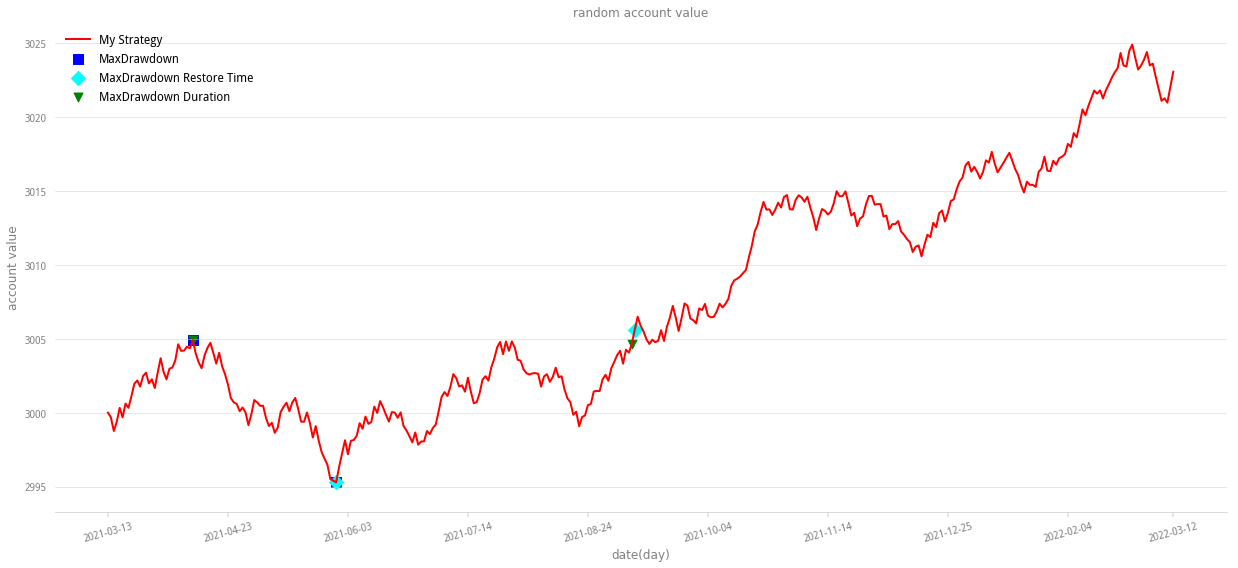

In [24]:
plot(xdate,ycapital)